In [6]:
%pylab
%matplotlib inline
from scipy.stats import norm

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [7]:
# generate true states

N = 100
tvec = np.arange(N)

z = np.zeros(N)
z[0] = np.random.rand() * 10

Gamma = 0.1
A = 0.99

for t in range (1, N):
    z[t] = norm.rvs(loc=z[t-1]*A, scale=Gamma**0.5)


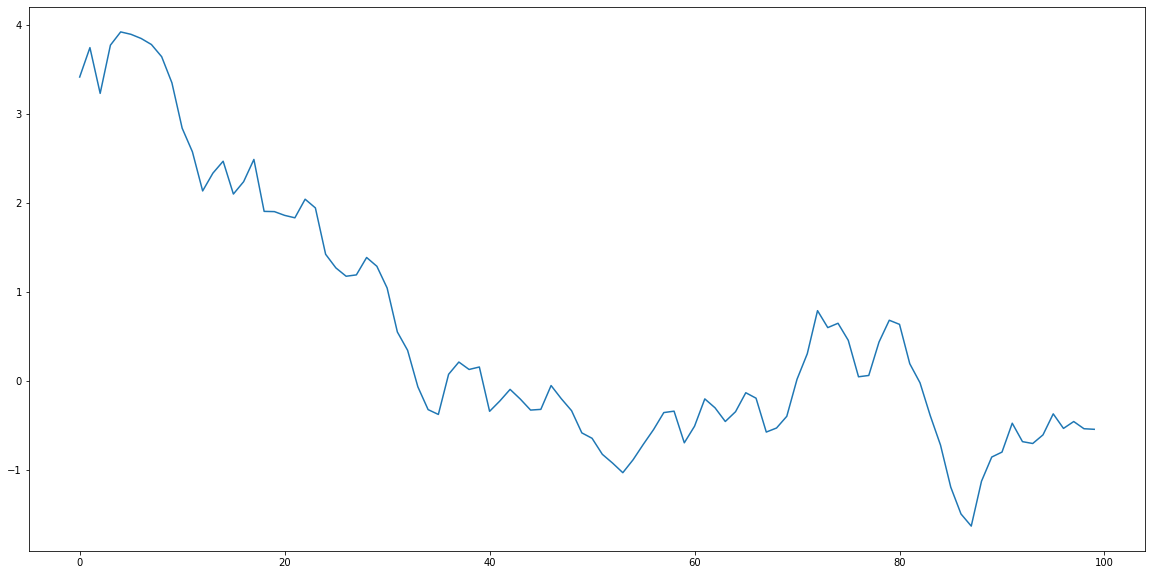

In [8]:
plt.figure(figsize=(20,10))
plt.plot(tvec, z)

In [9]:
x = np.zeros(N)

C = 1.1
Sigma = 0.2

for t in range(N):
    x[t] = norm.rvs(loc=C*z[t], scale=Sigma**0.5)

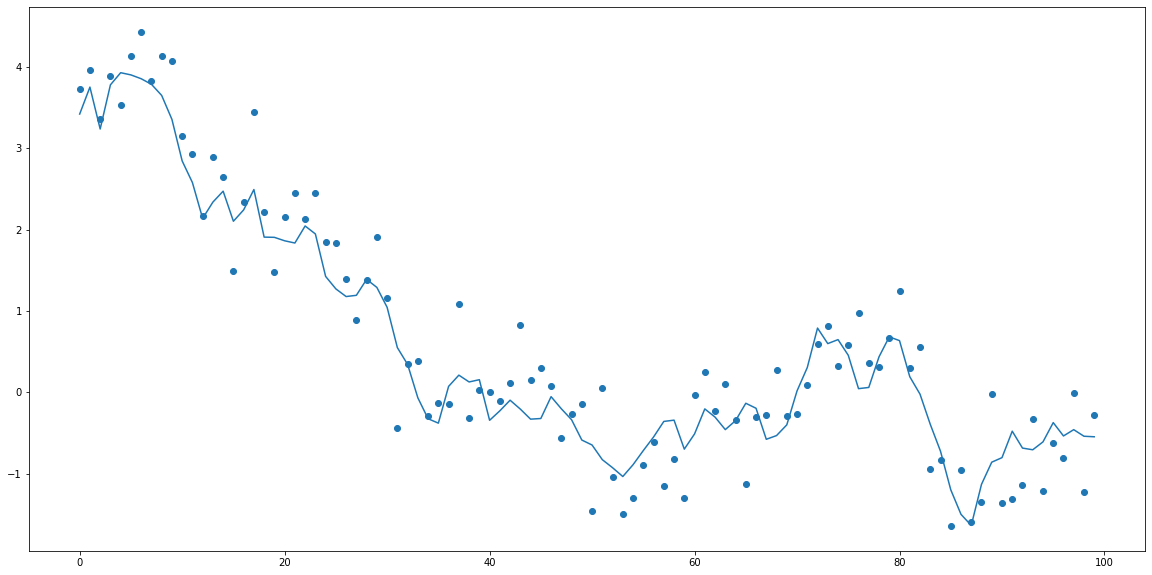

In [10]:
plt.figure(figsize=(20,10))
plt.plot(tvec, z)
plt.scatter(tvec, x)

In [11]:
mu = np.zeros(N)
V = np.zeros(N)

for t in range(N):
    
    P = A * V[t-1] * A + Gamma
    
    K = P * C * 1.0 / (C*P*C + Sigma)
    
    mu[t] = A * mu[t-1] + K * (x[t] - C*A*mu[t-1])
    V[t] = P - K*C*P
    
# predictions before observing the next data point:
muminus = np.insert(mu[:-1], 0, 0)

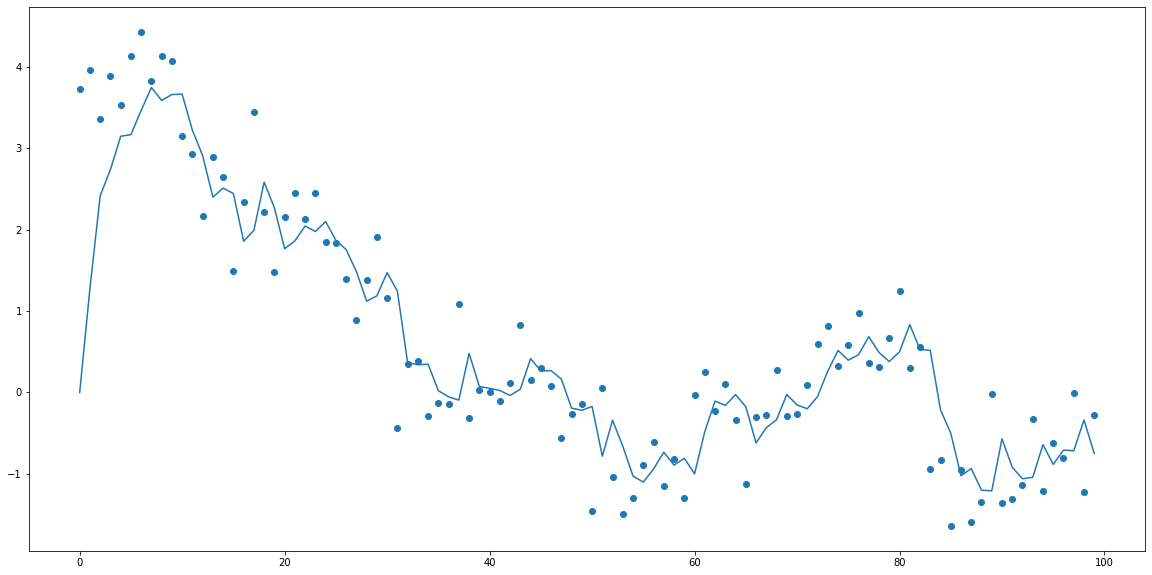

In [12]:
plt.figure(figsize=(20,10))
#plt.plot(tvec, z)
plt.scatter(tvec, x)
plt.plot(tvec, muminus)
#plt.plot(tvec, mu)

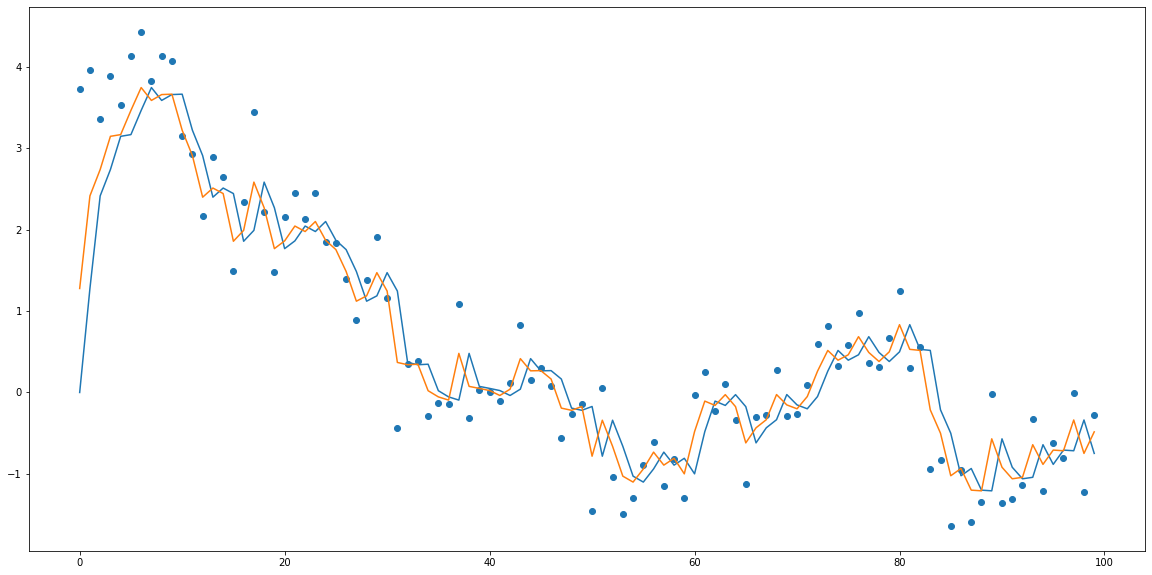

In [13]:
plt.figure(figsize=(20,10))
#plt.plot(tvec, z)
plt.scatter(tvec, x)
plt.plot(tvec, muminus)
plt.plot(tvec, mu)

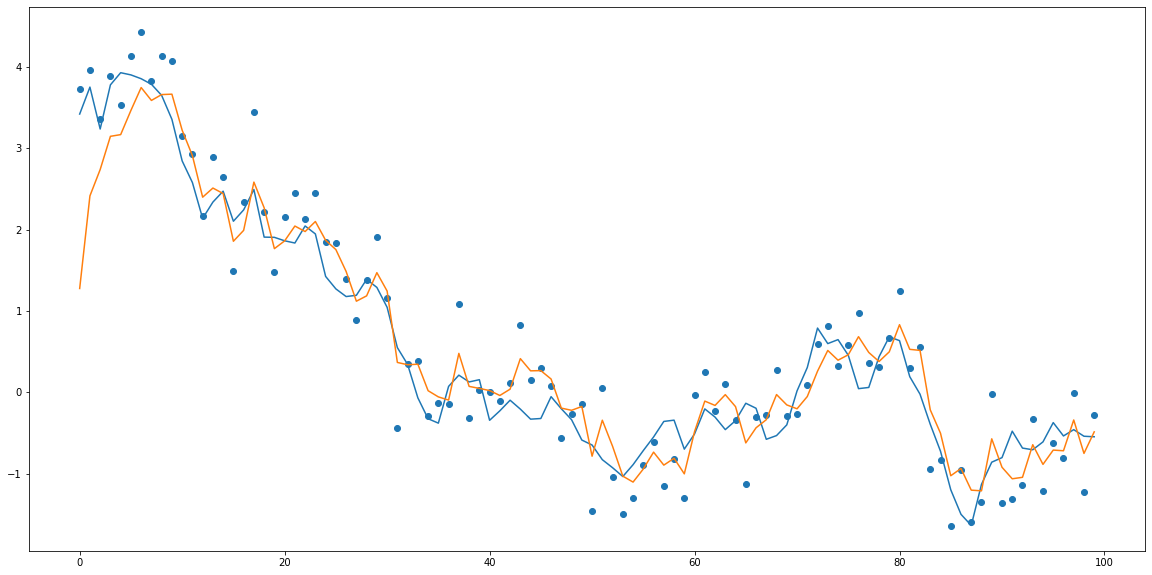

In [14]:
plt.figure(figsize=(20,10))
plt.plot(tvec, z)
plt.scatter(tvec, x)
#plt.plot(tvec, muminus)
plt.plot(tvec, mu)